# Description
This project is about predicting the likelihood of hearth attack among youngsters in India. The dataset provides data that can be utilized to identify potential patterns and predictors of heart disease, such as age, cholesterol level, blood pressure, and lifestyle factors. The dataset is suitable for supervised learning, as it includes labeled data where the target variable is whether an individual had a heart attack or not. The primary task associated with this dataset is classification. The goal is to predict whether a person is at risk of a heart attack based on the provided features. 


This project aims to analyze factors contributing to the rising incidence of heart attacks among young individuals in India, focusing on lifestyle, health metrics, and demographic data. Its goal is to build predictive models for early risk detection and enable proactive prevention strategies to reduce the prevalence of heart disease in youth.

# Data Source 
The dataset, "Heart Attack in Youth of India", is sourced from Kaggle, a public platform for datasetss and machine learning projects. It was 
curated and shared by Ankush Panday and contains health metrics and demographic details relevant to predicting heart attack risks.<br>
<b>Panday, A.(n.d). <i> Heart Attack in Youth of India</i>[Dataset].Kaggle.<br>https://www.kaggle.com/datasets/ankushpanday1/heart-attack-in-youth-of-india

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data_set = pd.read_csv('heart_attack_youngsters_india.csv')
data_set= data_set[data_set['Gender'] != 'Other']

In [3]:
y = data_set['Heart Attack Likelihood']


# Data description
There are 25 columns and 10000 rows one column is the target feature. The datasets has 9 numeric features and 16 categorical features. The key features of the dataset are Smoking Status, Physical Activity Level and Stress Level. 

In [5]:
y.info(), y.describe()

<class 'pandas.core.series.Series'>
Index: 9769 entries, 0 to 9999
Series name: Heart Attack Likelihood
Non-Null Count  Dtype 
--------------  ----- 
9769 non-null   object
dtypes: object(1)
memory usage: 152.6+ KB


(None,
 count     9769
 unique       2
 top         No
 freq      7775
 Name: Heart Attack Likelihood, dtype: object)

In [5]:
data_set.info(), data_set.describe()
data_set.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9769 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       9769 non-null   int64  
 1   Gender                                    9769 non-null   object 
 2   Region                                    9769 non-null   object 
 3   Urban/Rural                               9769 non-null   object 
 4   SES                                       9769 non-null   object 
 5   Smoking Status                            9769 non-null   object 
 6   Alcohol Consumption                       9769 non-null   object 
 7   Diet Type                                 9769 non-null   object 
 8   Physical Activity Level                   9769 non-null   object 
 9   Screen Time (hrs/day)                     9769 non-null   int64  
 10  Sleep Duration (hrs/day)                 

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


# Data Cleaning 

In [6]:
# I removed some features which are irrelevant in predicting heart attack. 
# Region, Urban/Rural, SES, Screen Time, Triglyceride Levels and Blood Oxygen Levels
data_set = data_set.drop(columns={'Region', 'Urban/Rural', 'SES', 'Screen Time (hrs/day)', 'Triglyceride Levels (mg/dL)', 'Blood Oxygen Levels (SpO2%)'})

In [8]:
# I removed the row of the datasets where gender is other for ease. 
data_set['Stress Level'] = data_set['Stress Level'].replace({'High': 2, 'Medium': 1, 'Low':0})
data_set['Gender'] = data_set['Gender'].replace({'Male': 1, 'Female': 0})
data_set['Alcohol Consumption'] = data_set['Alcohol Consumption'].replace({'Regularly': 2, 'Occasionally':1, 'Never':0})
data_set['Smoking Status'] = data_set['Smoking Status'].replace({'Never': 0, 'Occasionally': 1, 'Regularly': 2})
data_set['Diabetes'] = data_set['Diabetes'].replace({'Yes': 0, 'No': 1})
data_set['Hypertension'] = data_set['Hypertension'].replace({'Yes': 0, 'No': 1})
data_set['Exercise Induced Angina'] = data_set['Exercise Induced Angina'].replace({'Yes': 0, 'No': 1})
data_set['Chest Pain Type'] = data_set['Chest Pain Type'].replace({'Asymptomatic':0, 'Atypical':1, 'Non-anginal':2, 'Typical':3})
data_set['Family History of Heart Disease'] = data_set['Family History of Heart Disease'].replace({'Yes': 0, 'No': 1})
data_set['ECG Results'] = data_set['ECG Results'].replace({'Normal':0, 'Abnormal': 1})
data_set['Diet Type'] = data_set['Diet Type'].replace({'Vegetarian': 0, 'Non-Vegetarian': 2, 'Vegan': 1})
data_set['Physical Activity Level'] = data_set['Physical Activity Level'].replace({'Sedentary': 0, 'Moderate': 1, 'High': 2})
data_set['Heart Attack Likelihood'] = data_set['Heart Attack Likelihood'].replace({'Yes':1, 'No': 0})
data_set[['Systolic', 'Diastolic']] = data_set['Blood Pressure (systolic/diastolic mmHg)'].str.split('/', expand=True).astype(float)

data_set = data_set.drop(columns={'Blood Pressure (systolic/diastolic mmHg)'})

C:\Users\ashok\AppData\Local\Temp\ipykernel_36292\4065891891.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_set['Stress Level'] = data_set['Stress Level'].replace({'High': 2, 'Medium': 1, 'Low':0})
C:\Users\ashok\AppData\Local\Temp\ipykernel_36292\4065891891.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_set['Gender'] = data_set['Gender'].replace({'Male': 1, 'Female': 0})
C:\Users\ashok\AppData\Local\Temp\ipykernel_36292\4065891891.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be



(1) The dataset initially included 24 features, but unnecessary ones such as Region, Urban/Rural, and Screen Time were removed as they were not relevant for predicting heart attacks. After this process, the dataset was reduced to 19 features. Since it contained object data types, they were converted into categorical data types of int64. Additionally, rows with "others" in the Gender column were excluded for simplicity. Some features like BMI contained string value for float data so they were converted into float64. 

(2) There might be problem with features which contains 3 values 0, 1, 2 ( which could indicate Low, Medium, High). 

(3)   
|<br>
|<br><t>
|<br>
V

In [9]:
data_set.info(), data_set.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9769 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              9769 non-null   int64  
 1   Gender                           9769 non-null   int64  
 2   Smoking Status                   9769 non-null   int64  
 3   Alcohol Consumption              9769 non-null   int64  
 4   Diet Type                        9769 non-null   int64  
 5   Physical Activity Level          9769 non-null   int64  
 6   Sleep Duration (hrs/day)         9769 non-null   int64  
 7   Family History of Heart Disease  9769 non-null   int64  
 8   Diabetes                         9769 non-null   int64  
 9   Hypertension                     9769 non-null   int64  
 10  Cholesterol Levels (mg/dL)       9769 non-null   int64  
 11  BMI (kg/m²)                      9769 non-null   float64
 12  Stress Level             

(None,
                Age       Gender  Smoking Status  Alcohol Consumption  \
 count  9769.000000  9769.000000     9769.000000          9769.000000   
 mean     26.602109     0.502917        0.702017             0.500051   
 std       5.165032     0.500017        0.784627             0.670717   
 min      18.000000     0.000000        0.000000             0.000000   
 25%      22.000000     0.000000        0.000000             0.000000   
 50%      27.000000     1.000000        0.000000             0.000000   
 75%      31.000000     1.000000        1.000000             1.000000   
 max      35.000000     1.000000        2.000000             2.000000   
 
          Diet Type  Physical Activity Level  Sleep Duration (hrs/day)  \
 count  9769.000000              9769.000000               9769.000000   
 mean      1.091002                 0.606408                  6.494523   
 std       0.944406                 0.666537                  2.288247   
 min       0.000000                 0.

In [10]:
data_set.head()

,Age,Gender,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Sleep Duration (hrs/day),Family History of Heart Disease,Diabetes,Hypertension,...,BMI (kg/m²),Stress Level,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Heart Attack Likelihood,Systolic,Diastolic
0,30,1,0,2,2,0,8,1,1,0,...,34.4,2,82,0,2,183,1,0,177.0,63.1
1,24,0,1,1,2,0,9,1,1,1,...,25.0,2,76,0,2,118,1,0,137.5,110.7
2,24,0,1,1,1,2,3,0,0,1,...,33.9,0,86,0,3,164,1,1,138.3,76.6
3,27,1,1,0,0,0,7,1,1,1,...,19.0,1,106,0,2,188,1,1,177.1,90.0
4,21,0,1,1,0,1,9,0,1,1,...,28.0,0,73,0,1,216,1,0,130.7,108.8


# Exploratory Data Analysis


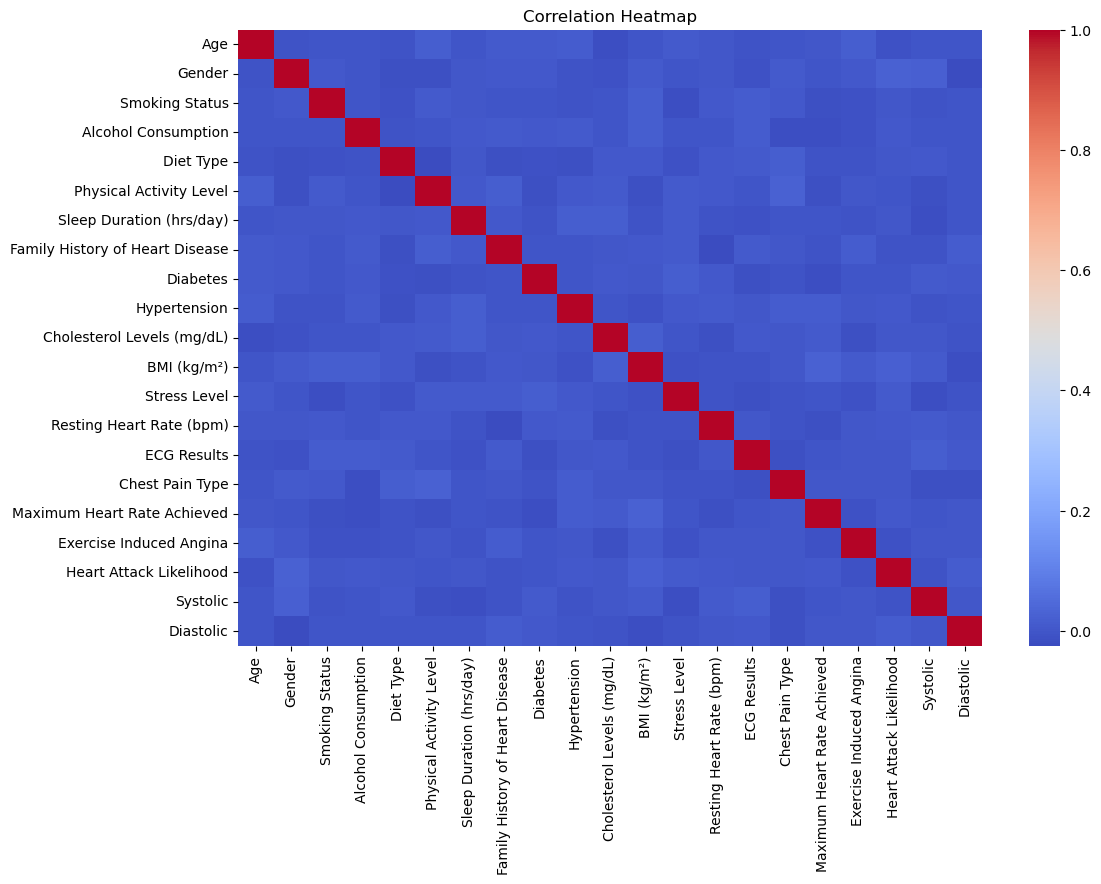

Heart Attack Likelihood    1.000000
Gender                     0.022951
BMI (kg/m²)                0.019295
Diastolic                  0.011712
Age                        0.011635
Name: Heart Attack Likelihood, dtype: float64

In [41]:


# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data_set.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Identify top correlated features with 'Heart Attack Likelihood'
top_features = correlation_matrix["Heart Attack Likelihood"].abs().sort_values(ascending=False).head(5)
top_features

For this dataset, correlation matrix shows the relationships between most features and "Heart Attack Likelihood" are very weak, meaning no single feature strongly predicts it on its own. The plot helps identify which features might be useful to focus on, but here it suggests that none of the features are highly related to the target.However, <b> Gender, BMI, Diastolic and Age</b> are strong feature among other. 

C:\Users\ashok\AppData\Local\Temp\ipykernel_36292\358946957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_set, x="Heart Attack Likelihood", y=feature, ax=ax, palette="Set2")
C:\Users\ashok\AppData\Local\Temp\ipykernel_36292\358946957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_set, x="Heart Attack Likelihood", y=feature, ax=ax, palette="Set2")
C:\Users\ashok\AppData\Local\Temp\ipykernel_36292\358946957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_set, x="Heart Attack Likelihood", y=feature, 

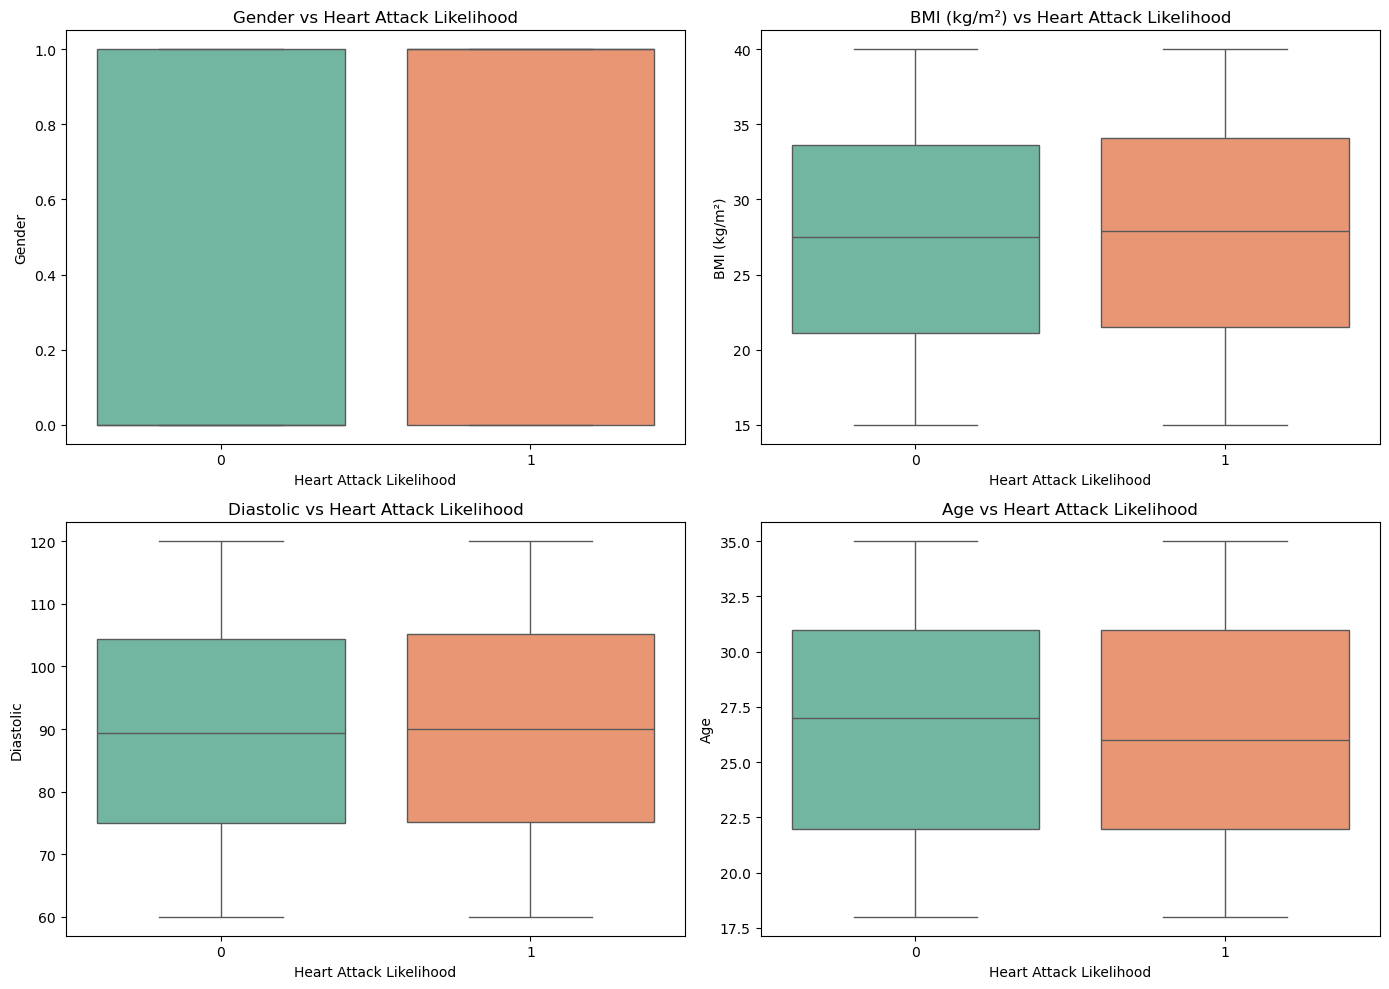

In [17]:
# Visualize key features against 'Heart Attack Likelihood'
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features_to_plot = ['Gender', 'BMI (kg/m²)', 'Diastolic', 'Age']

for ax, feature in zip(axes.flatten(), features_to_plot):
    sns.boxplot(data=data_set, x="Heart Attack Likelihood", y=feature, ax=ax, palette="Set2")
    ax.set_title(f"{feature} vs Heart Attack Likelihood")

plt.tight_layout()
plt.show()

The boxplots show how <b>Gender, BMI, Diastolic Blood Pressure, and Age</b> relate to the chance of a heart attack. For Gender, there’s no clear difference between the groups. BMI is slightly higher for people with a greater chance of a heart attack, but the overlap is large. Diastolic Blood Pressure looks almost the same for all groups. Age shows a small increase for higher chances, but there’s still a lot of overlap. Overall, none of these features alone strongly predict the likelihood of a heart attack.

# Models 
Logistic Regression, Random Forest and XGBoost

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
 #Define models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [33]:
# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

C:\Users\ashok\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:54:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [34]:
# Predictions
logistic_preds = logistic_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

In [35]:
# Evaluation
logistic_acc = accuracy_score(y_test, logistic_preds)
random_forest_acc = accuracy_score(y_test, random_forest_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)

In [37]:
logistic_acc, random_forest_acc, xgb_acc

(0.7932446264073695, 0.7932446264073695, 0.7763561924257932)

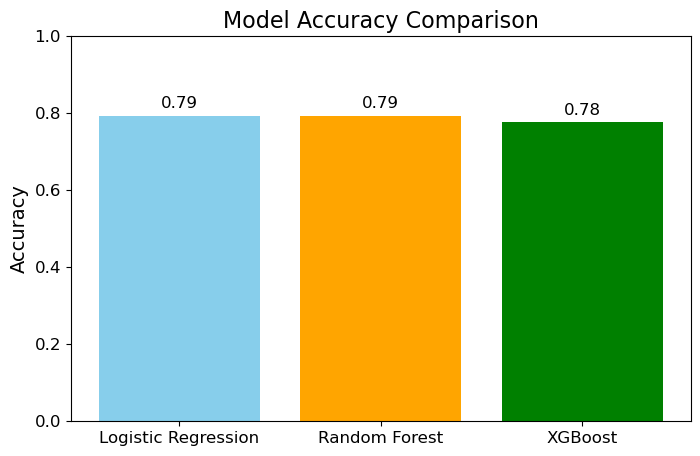

In [38]:
# Model names and their accuracies
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [logistic_acc, random_forest_acc, xgb_acc]

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green'])
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.show()

# Result and Analysis
I used three supervised algorithms for this task Logistic Regression, Random Forest, and XGBoost. I chose accuracy as the evaluation metric because it is simple to understand and measures the overall percentage of correct predictions. It works well when the dataset has balanced classes, making it a reliable baseline for comparison. If the classes are imbalanced, metrics like precision, recall, F1 score, or ROC-AUC would be more appropriate to capture model performance better.The best model for this task are Logistic Regression and Random Forest. 

# Discussion and Conclusion
Here I chose accuracy as the evaluation metric because it provides a straightforward measure of how well the model predicts the target variable. It is particularly effective for balanced datasets, where each class is represented equally. However, if the dataset is imbalanced, accuracy can be misleading as it might favor the majority class, making metrics like precision, recall, or F1 score more appropriate. To improve the evaluation, future efforts could focus on analyzing the class distribution, applying resampling techniques, or incorporating metrics that address specific types of misclassifications, such as false negatives, which may be critical in this context.